<a href="https://colab.research.google.com/github/HeerRawal0138pg/class-assignment/blob/main/Orders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-2-4ab983193dcc>:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')
<ipython-input-2-4ab983193dcc>:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['SHIPDATE'] = pd.to_datetime(df['SHIPDATE'], errors='coerce')


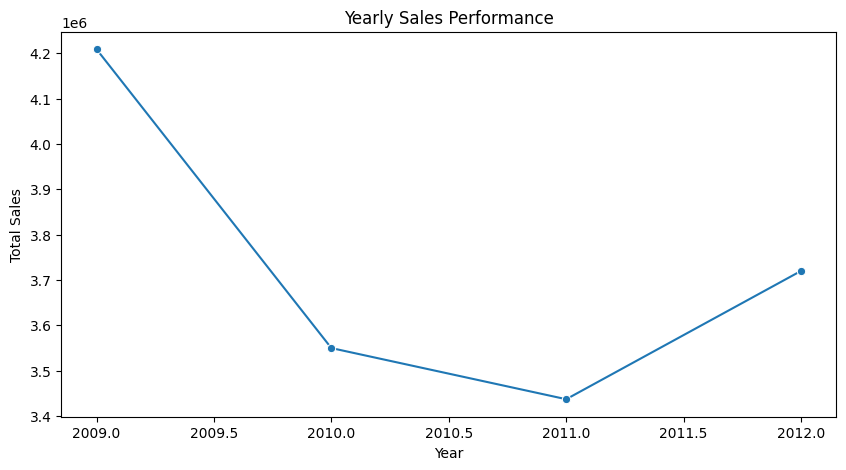

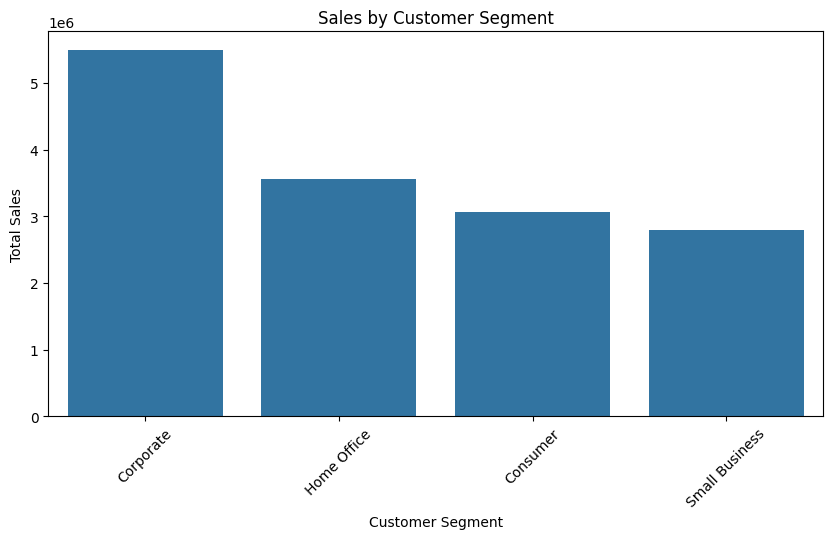

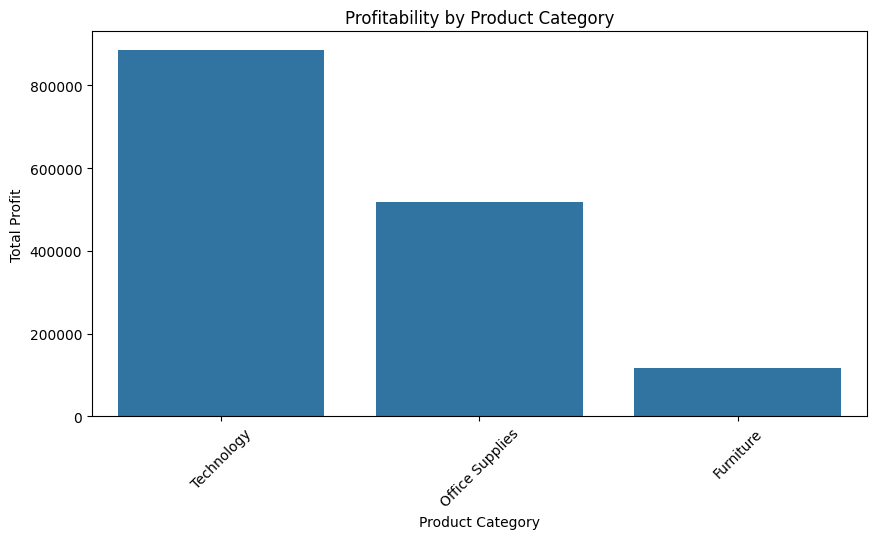

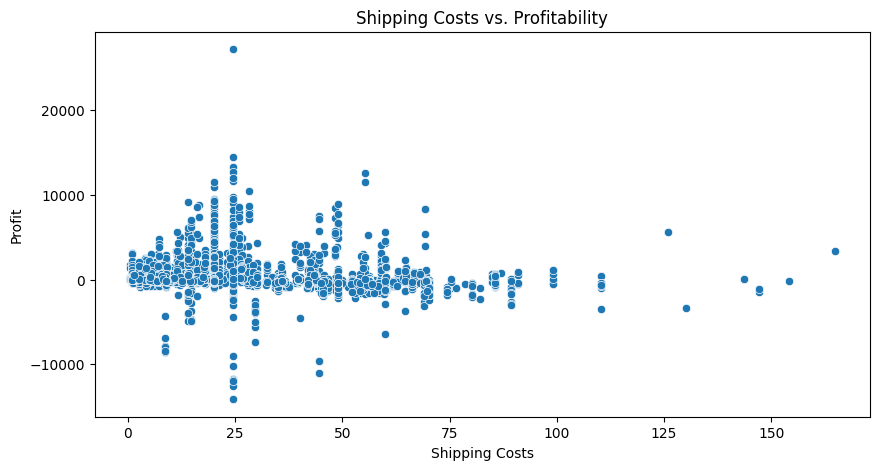

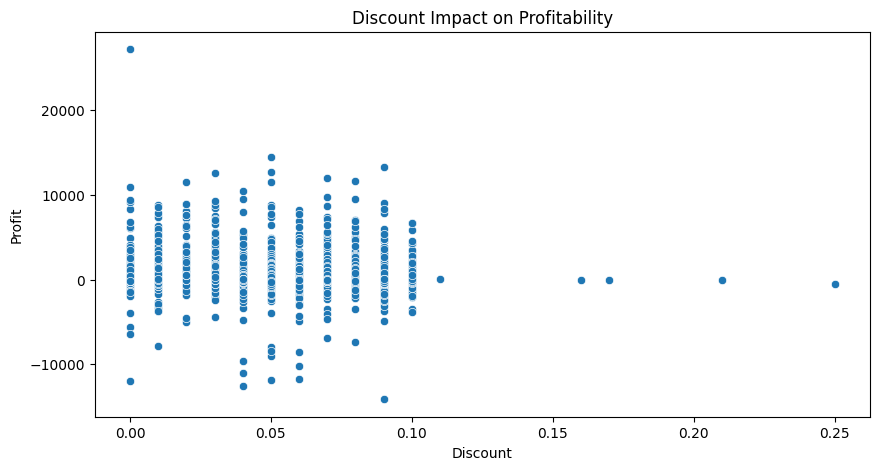

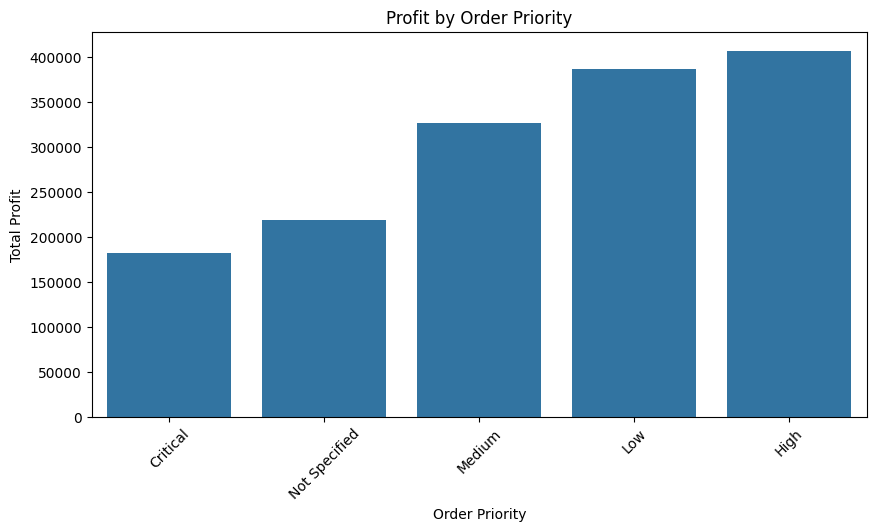

Total Loss-Making Transactions: 4264
    ORDERID                                        PRODUCTNAME    SALES  \
0         3   Eldon Base for stackable storage shelf, platinum   261.54   
6       613  Angle-D Binders with Locking Rings, Label Holders    93.54   
8       643              SAFCO Commercial Wire Shelving, Black  2781.82   
9       678                                          Xerox 198   228.41   
10      807                                         Xerox 1980   196.85   

    PROFIT  
0  -213.25  
6   -54.04  
8  -695.26  
9  -226.36  
10 -166.85  


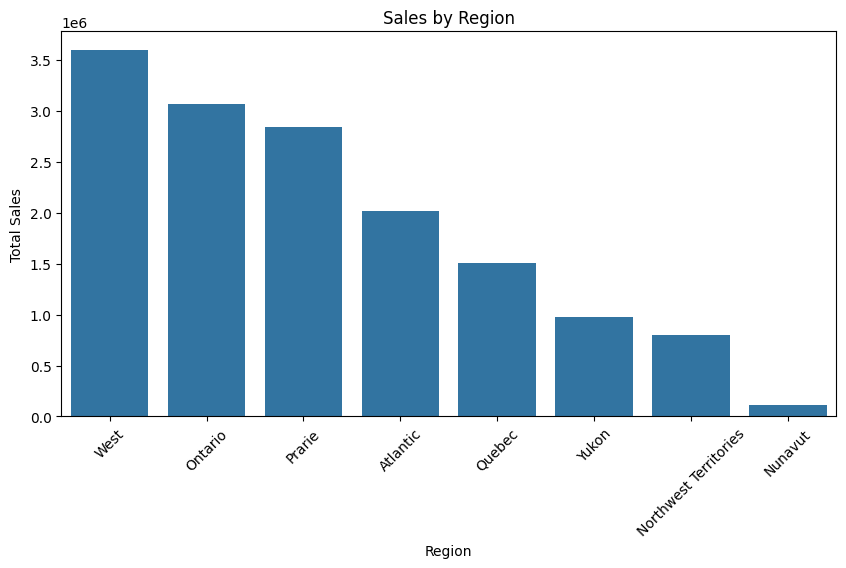

Top 10 Frequent Product Pairs:
[(('Canon MP41DH Printing Calculator', 'Computer Printout Paper with Letter-Trim Perforations'), 2), (('Canon MP41DH Printing Calculator', 'Filing/Storage Totes and Swivel Casters'), 2), (('Rush Hierlooms Collection Rich Wood Bookcases', '5165'), 2), (('Self-Adhesive Address Labels for Typewriters by Universal', 'Accessory37'), 2), (('Accessory8', 'T39m'), 2), (('688', 'M3682'), 2), (('Electrix Halogen Magnifier Lamp', 'Luxo Professional Fluorescent Magnifier Lamp with Clamp-Mount Base'), 2), (('Hon 4700 Series MobuisÈ Mid-Back Task Chairs with Adjustable Arms', 'Southworth 25% Cotton Premium Laser Paper and Envelopes'), 2), (('Bretford Rectangular Conference Table Tops', 'T28 WORLD'), 2), (('Hon 4700 Series MobuisÈ Mid-Back Task Chairs with Adjustable Arms', 'Telescoping Adjustable Floor Lamp'), 2)]


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

# Load dataset
df = pd.read_csv("/content/ORDERS.csv",encoding="ISO-8859-1")

# Convert date columns to datetime format
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')
df['SHIPDATE'] = pd.to_datetime(df['SHIPDATE'], errors='coerce')

# Sales Performance Analysis
sales_summary = df.groupby(df['ORDERDATE'].dt.year)['SALES'].sum()
plt.figure(figsize=(10, 5))
sns.lineplot(x=sales_summary.index, y=sales_summary.values, marker='o')
plt.title("Yearly Sales Performance")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.show()

# Customer Segmentation
customer_sales = df.groupby('CUSTOMERSEGMENT')['SALES'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=customer_sales.index, y=customer_sales.values)
plt.title("Sales by Customer Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

# Product Profitability Analysis
product_profit = df.groupby('PRODUCTCATEGORY')['PROFIT'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=product_profit.index, y=product_profit.values)
plt.title("Profitability by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Profit")
plt.xticks(rotation=45)
plt.show()

# Shipping Costs vs. Profitability
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['SHIPPINGCOSTS'], y=df['PROFIT'])
plt.title("Shipping Costs vs. Profitability")
plt.xlabel("Shipping Costs")
plt.ylabel("Profit")
plt.show()

# Discount Impact on Profitability
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['DISCOUNT'], y=df['PROFIT'])
plt.title("Discount Impact on Profitability")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.show()

# Order Priority Analysis
priority_profit = df.groupby('ORDERPRIOTORITY')['PROFIT'].sum().sort_values()
plt.figure(figsize=(10, 5))
sns.barplot(x=priority_profit.index, y=priority_profit.values)
plt.title("Profit by Order Priority")
plt.xlabel("Order Priority")
plt.ylabel("Total Profit")
plt.xticks(rotation=45)
plt.show()

# Loss-Making Transactions
loss_orders = df[df['PROFIT'] < 0]
print("Total Loss-Making Transactions:", len(loss_orders))
print(loss_orders[['ORDERID', 'PRODUCTNAME', 'SALES', 'PROFIT']].head())

# Regional Sales Analysis
region_sales = df.groupby('REGION')['SALES'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=region_sales.index, y=region_sales.values)
plt.title("Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

# Market Basket Analysis (Frequent Product Pairs)
basket = df.groupby('ORDERID')['PRODUCTNAME'].apply(list)
pairs = Counter()
for order in basket:
    pairs.update(combinations(order, 2))
print("Top 10 Frequent Product Pairs:")
print(pairs.most_common(10))
